In [16]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Read in the data
data = pd.read_csv("Market Data EURGBP MA Stoch ATR  As Series.csv")

In [3]:
data

Time     Open     High      Low    Close   MA Fast  \
0     2010.10.13 00:00:00  0.88033  0.88383  0.87753  0.87822  0.862618   
1     2010.10.14 00:00:00  0.87822  0.88185  0.87697  0.87942  0.864218   
2     2010.10.15 00:00:00  0.87938  0.87938  0.87195  0.87402  0.865152   
3     2010.10.18 00:00:00  0.87404  0.87939  0.87048  0.87750  0.866328   
4     2010.10.19 00:00:00  0.87753  0.88240  0.87383  0.87482  0.867136   
...                   ...      ...      ...      ...      ...       ...   
3645  2024.10.28 00:00:00  0.83179  0.83431  0.83157  0.83359  0.834930   
3646  2024.10.29 00:00:00  0.83348  0.83402  0.82987  0.83120  0.834575   
3647  2024.10.30 00:00:00  0.83120  0.83765  0.82930  0.83754  0.834857   
3648  2024.10.31 00:00:00  0.83749  0.84478  0.83532  0.84368  0.835698   
3649  2024.11.01 00:00:00  0.84366  0.84428  0.84220  0.84258  0.836353   

       MA Slow  Stoch Main       ATR  
0     0.847057   75.602837  0.008239  
1     0.848118   86.702128  0.008139  
2     0.848967   57.241379  0.008424  
3     0.849903   51.193376  0.008089  
4     0.850720   25.475285  0.008182  
...        ...         ...       ...  
3645  0.839474   72.494172  0.003229  
3646  0.839203   37.723214  0.003360  
3647  0.839148   67.122186  0.003734  
3648  0.839297   85.312783  0.004275  
3649  0.839404   96.485623  0.004244  

[3650 rows x 9 columns]

In [4]:
#Let us forecast 20 steps into the future
look_ahead = 20

In [5]:
#Let's visualize the data
data["Binary Target"] = 0
data.loc[data["Close"].shift(-look_ahead) > data["Close"],"Binary Target"] = 1
data = data.iloc[:-look_ahead,:]
data

Time     Open     High      Low    Close   MA Fast  \
0     2010.10.13 00:00:00  0.88033  0.88383  0.87753  0.87822  0.862618   
1     2010.10.14 00:00:00  0.87822  0.88185  0.87697  0.87942  0.864218   
2     2010.10.15 00:00:00  0.87938  0.87938  0.87195  0.87402  0.865152   
3     2010.10.18 00:00:00  0.87404  0.87939  0.87048  0.87750  0.866328   
4     2010.10.19 00:00:00  0.87753  0.88240  0.87383  0.87482  0.867136   
...                   ...      ...      ...      ...      ...       ...   
3625  2024.09.30 00:00:00  0.83411  0.83601  0.83126  0.83242  0.839025   
3626  2024.10.01 00:00:00  0.83245  0.83452  0.83028  0.83307  0.838458   
3627  2024.10.02 00:00:00  0.83302  0.83380  0.83212  0.83256  0.837896   
3628  2024.10.03 00:00:00  0.83241  0.84342  0.83181  0.84044  0.838138   
3629  2024.10.04 00:00:00  0.84040  0.84064  0.83530  0.83639  0.837972   

       MA Slow  Stoch Main       ATR  Binary Target  
0     0.847057   75.602837  0.008239              0  
1     0.848118   86.702128  0.008139              0  
2     0.848967   57.241379  0.008424              0  
3     0.849903   51.193376  0.008089              0  
4     0.850720   25.475285  0.008182              0  
...        ...         ...       ...            ...  
3625  0.843955   26.510067  0.003653              1  
3626  0.843599   32.247899  0.003626              0  
3627  0.843237    9.080460  0.003575              1  
3628  0.843145   64.970501  0.004220              1  
3629  0.842923   65.852334  0.004434              1  

[3630 rows x 10 columns]

In [6]:
#Scale the data before we start visualizing it
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data[['Open', 'High', 'Low', 'Close', 'MA Fast', 'MA Slow','Stoch Main']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'MA Fast', 'MA Slow','Stoch Main']])

<ipython-input-6-b2a044d397d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Open', 'High', 'Low', 'Close', 'MA Fast', 'MA Slow','Stoch Main']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'MA Fast', 'MA Slow','Stoch Main']])


In [7]:
import plotly.express as px

In [8]:
# Create a 3D scatter plot showing the ineteraction between the slow and fast moving average
fig = px.scatter_3d(
    data, x=data.index, y='MA Slow', z='MA Fast',
    color='Binary Target',
    title="3D Scatter Plot of Time, The Slow Moving Average, and The Fast Moving Average",
    labels={'x': 'Time', 'y': 'MA Fast', 'z':'MA Slow'}
)

# Update layout for custom size
fig.update_layout(
    width=800,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Adjust marker size for visibility
fig.update_traces(marker=dict(size=2))  # Set marker size to a smaller value

fig.show()

In [10]:
# Create a 3D scatter plot showing the ineteraction between the slow and fast moving average and the ATR
fig = px.scatter_3d(
    data, x='ATR', y='MA Slow', z='MA Fast',
    color='Binary Target',
    title="3D Scatter Plot of ATR, The Slow Moving Average, and The Fast Moving Average",
    labels={'x': 'ATR', 'y': 'MA Fast', 'z':'MA Slow'}
)

# Update layout for custom size
fig.update_layout(
    width=800,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Adjust marker size for visibility
fig.update_traces(marker=dict(size=2))  # Set marker size to a smaller value

fig.show()

In [13]:
# Create a 3D scatter plot showing the ineteraction between the slow and fast moving average
fig = px.scatter_3d(
    data, x='ATR', y='Stoch Main', z='MA Slow',
    color='Binary Target',
    title="3D Scatter Plot of ATR, The Slow Moving Average, and The Fast Moving Average",
    labels={'x': 'ATR', 'y': 'MA Fast', 'z':'MA Slow'}
)

# Update layout for custom size
fig.update_layout(
    width=800,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Adjust marker size for visibility
fig.update_traces(marker=dict(size=2))  # Set marker size to a smaller value

fig.show()

In [11]:
# Creating a 3D scatter plot of the slow and fast moving average and the stochastic oscillator
fig = px.scatter_3d(
    data, x='MA Fast', y='MA Slow', z='Stoch Main',
    color='Binary Target',
    title="3D Scatter Plot of Time, Close Price, and The Stochastic Oscilator",
    labels={'x': 'Time', 'y': 'Close Price', 'z': 'Stochastic Oscilator'}
)

# Update layout for custom size
fig.update_layout(
    width=800,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Adjust marker size for visibility
fig.update_traces(marker=dict(size=2))  # Set marker size to a smaller value

fig.show()

In [17]:
# Selecting features to include in PCA
features = data[['Open', 'High', 'Low', 'Close','MA Fast', 'MA Slow','ATR','Stoch Main']]
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features.dropna())

# Plotting PCA results
# Create a new DataFrame with PCA results and target variable for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['target'] = data['Binary Target'].iloc[:len(pca_components)]  # Add target column

# Plot PCA results with binary target as hue
fig = px.scatter(
    pca_df, x='PC1', y='PC2', color='target',
    title="2D PCA Plot of OHLC Data with Target Hue",
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'color': 'Target'}
)

# Update layout for custom size
fig.update_layout(
    width=600,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

fig.show()

In [ ]:
# Assuming `data` contains your dataset and `target` is the binary target variable
# Prepare data by selecting only relevant features and dropping NaNs if necessary
features = data[['Open', 'High', 'Low', 'Close','MA Fast', 'MA Slow','ATR','Stoch Main']]  # Include relevant columns
pca = PCA(n_components=3)
pca_components = pca.fit_transform(features.dropna())  # Apply PCA transformation

# Create a new DataFrame with PCA results and target variable for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Target'] = data['Binary Target'].iloc[:len(pca_components)]  # Add target column

# 3D scatter plot with binary target as color
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='Target',
    title="3D PCA Plot with Target Hue",
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3', 'color': 'Target'}
)

# Update layout for custom size
fig.update_layout(
    width=600,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Adjust marker size for visibility
fig.update_traces(marker=dict(size=2))  # Set marker size to a smaller value


# Show plot
fig.show()

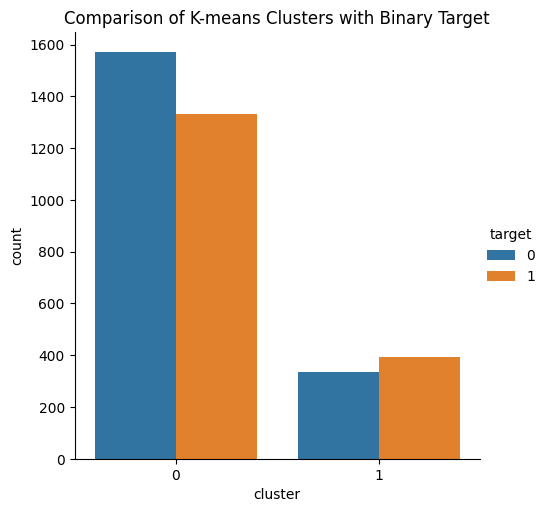

In [ ]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = data[['Open', 'High', 'Low', 'Close', 'MA Fast', 'MA Slow','Stoch Main','ATR']]
target = data['Binary Target'].iloc[:len(features)]  # Ensure target matches length of features

# Apply K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(features)

# Create a DataFrame for plotting with target and cluster labels
plot_data = pd.DataFrame({
    'target': target,
    'cluster': clusters
})

# Plot with seaborn's catplot to compare the binary target and cluster assignments
sns.catplot(x='cluster', hue='target',kind='count', data=plot_data)
plt.title("Comparison of K-means Clusters with Binary Target")
plt.show()

In [ ]:
#Read in the data
data = pd.read_csv("Market Data EURGBP MA Stoch ATR  As Series.csv")

#Add targets
data["ATR Target"] = data["ATR"].shift(-look_ahead)
data["Target"] = data["Close"].shift(-look_ahead) - data["Close"]

Text(0.5, 1.0, 'Visualizing the correlation levels in our Data')

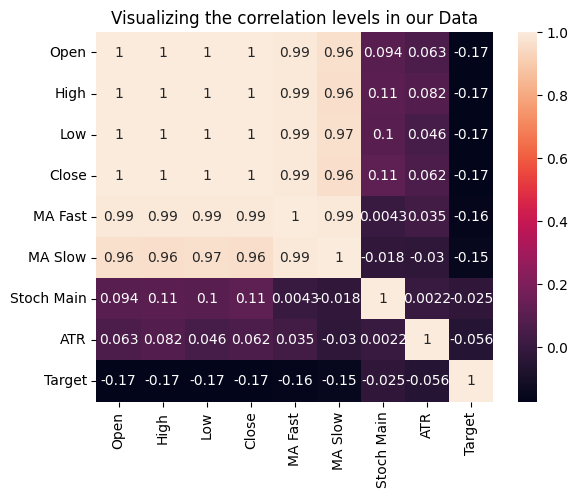

In [ ]:
#Visualize the correlation levels
sns.heatmap(data.loc[:,["Open","High","Low","Close","MA Fast","MA Slow","Stoch Main","ATR","Target"]].corr(),annot=True)
plt.title("Visualizing the correlation levels in our Data")

In [ ]:
#Let's think of the different ways we can show the indicators to our AI Model
#We can describe the indicator by its current reading
#We can describe the indicator using markov states
#We can describe the change in the indicator's value

#Let's see which form helps our AI Model predict the future ATR value
data["ATR 1"] = 0
data["ATR 2"] = 0

#Set the states
data.loc[data["ATR"] > data["ATR"].shift(look_ahead),"ATR 1"] = 1
data.loc[data["ATR"] < data["ATR"].shift(look_ahead),"ATR 2"] = 1

#Set the change in the ATR
data["Change in ATR"] = data["ATR"] - data["ATR"].shift(look_ahead)

#We'll do the same for the stochastic
data["STO 1"] = 0
data["STO 2"] = 0
data["STO 3"] = 0

#Set the states
data.loc[data["Stoch Main"] > 80,"STO 1"] = 1
data.loc[data["Stoch Main"] < 20,"STO 2"] = 1
data.loc[(data["Stoch Main"] >= 20) & (data["Stoch Main"] <= 80) ,"STO 3"] = 1

#Set the change in the stochastic
data["Change in STO"] = data["Stoch Main"] - data["Stoch Main"].shift(look_ahead)

#Finally the moving averages
data["MA 1"] = 0
data["MA 2"] = 0

#Set the states
data.loc[data["MA Fast"] > data["MA Slow"],"MA 1"] = 1
data.loc[data["MA Fast"] < data["MA Slow"],"MA 2"] = 1

#Difference in the MA Height
data["Change in MA"] = (data["MA Fast"] - data["MA Slow"]) - (data["MA Fast"].shift(look_ahead) - data["MA Slow"].shift(look_ahead))

#Difference in price
data["Change in Close"] = data["Close"] - data["Close"].shift(look_ahead)

#Clean the data
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

#Drop the last 2 years of test data
data = data.iloc[:((-365*2) - 18),:]
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

data

<ipython-input-55-d6ee5af957a0>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Time     Open     High      Low    Close   MA Fast  \
0     2010.11.10 00:00:00  0.86123  0.86374  0.85247  0.85474  0.869014   
1     2010.11.11 00:00:00  0.85474  0.85504  0.84554  0.84735  0.866950   
2     2010.11.12 00:00:00  0.84736  0.85586  0.84485  0.84968  0.865306   
3     2010.11.15 00:00:00  0.84830  0.85120  0.84522  0.84600  0.863467   
4     2010.11.16 00:00:00  0.84599  0.85246  0.84540  0.84894  0.862084   
...                   ...      ...      ...      ...      ...       ...   
2857  2021.11.12 00:00:00  0.85606  0.85669  0.85254  0.85310  0.851493   
2858  2021.11.15 00:00:00  0.85248  0.85374  0.84709  0.84723  0.851087   
2859  2021.11.16 00:00:00  0.84727  0.84824  0.84266  0.84285  0.850303   
2860  2021.11.17 00:00:00  0.84255  0.84363  0.83851  0.83878  0.849205   
2861  2021.11.18 00:00:00  0.83883  0.84267  0.83834  0.84236  0.848554   

       MA Slow  Stoch Main       ATR  ATR Target  ...  ATR 2  Change in ATR  \
0     0.859471    0.000000  0.008668    0.008094  ...      0       0.000429   
1     0.859074    0.000000  0.008999    0.007945  ...      0       0.000860   
2     0.858766    4.412879  0.009224    0.007781  ...      0       0.000800   
3     0.858347    4.726166  0.008579    0.007874  ...      0       0.000489   
4     0.858039   13.670558  0.008796    0.007921  ...      0       0.000614   
...        ...         ...       ...         ...  ...    ...            ...   
2857  0.852136   48.951782  0.004715    0.004941  ...      1      -0.000246   
2858  0.851975   15.666456  0.004951    0.004941  ...      0       0.000498   
2859  0.851676    0.000000  0.004986    0.005049  ...      0       0.000572   
2860  0.851253    0.000000  0.004971    0.005071  ...      0       0.000752   
2861  0.850962    7.814888  0.004997    0.004944  ...      0       0.001186   

      STO 1  STO 2  STO 3  Change in STO  MA 1  MA 2  Change in MA  \
0         0      1      0     -75.602837     1     0     -0.006019   
1         0      1      0     -86.702128     1     0     -0.008224   
2         0      1      0     -52.828501     1     0     -0.009645   
3         0      1      0     -46.467209     1     0     -0.011305   
4         0      1      0     -11.804727     1     0     -0.012372   
...     ...    ...    ...            ...   ...   ...           ...   
2857      0      0      1      45.667884     0     1      0.001992   
2858      0      1      0      -0.138787     0     1      0.002046   
2859      0      1      0     -12.455726     0     1      0.001949   
2860      0      1      0     -13.237139     0     1      0.001646   
2861      0      1      0       7.814888     0     1      0.001600   

      Change in Close  
0            -0.02348  
1            -0.03207  
2            -0.02434  
3            -0.03150  
4            -0.02588  
...               ...  
2857          0.00966  
2858          0.00168  
2859         -0.00055  
2860         -0.00393  
2861         -0.00034  

[2862 rows x 22 columns]

In [ ]:
#Let's see which method of presentation is most effective
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit,cross_val_score

In [ ]:
tscv = TimeSeriesSplit(n_splits=5,gap=look_ahead)

In [ ]:
#Our baseline accuracy forecasting the change in price using current price
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["Close"]],data.loc[:,"Target"],cv=tscv))

-0.14861941262441164

In [ ]:
#Our accuracy forecasting the change in price using current change in price
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["Change in Close"]],data.loc[:,"Target"],cv=tscv))

-0.1033528767401429

In [ ]:
#Our accuracy forecasting the change in price using the stochastic
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["Stoch Main"]],data.loc[:,"Target"],cv=tscv))

-0.09152071417994265

In [ ]:
#Our accuracy forecasting the change in price using the stochastic
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["Change in STO"]],data.loc[:,"Target"],cv=tscv))

-0.07090156075020868

In [ ]:
#Our accuracy forecasting the change in price using the stochastic
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["STO 1","STO 2","STO 3"]],data.loc[:,"Target"],cv=tscv))

-0.016422009836789698

In [ ]:
#Our accuracy forecasting the ATR
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["ATR"]],data.loc[:,"ATR Target"],cv=tscv))

-0.023953677440629772

In [ ]:
#Our accuracy forecasting the ATR using the change in the ATR
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["Change in ATR"]],data.loc[:,"ATR Target"],cv=tscv))

-0.5916640039518372

In [ ]:
#Our accuracy forecasting the ATR using the current state of the ATR
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["ATR 1","ATR 2"]],data.loc[:,"ATR Target"],cv=tscv))

-0.49362780061515144

In [ ]:
#Our accuracy forecasting the change in price using the moving averages
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["MA Fast","MA Slow"]],data.loc[:,"Target"],cv=tscv))

-0.4244109841330369

In [ ]:
#Our accuracy forecasting the change in price using the moving averages
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["MA Slow","MA Fast"]],data.loc[:,"Target"],cv=tscv))

-0.41868715470139356

In [ ]:
#Our accuracy forecasting the change in price using the change in the moving averages
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["Change in MA"]],data.loc[:,"Target"],cv=tscv))

-0.11570348378760871

In [ ]:
#Our accuracy forecasting the change in price using the state of moving averages
np.mean(cross_val_score(GradientBoostingRegressor(),data.loc[:,["MA 1","MA 2"]],data.loc[:,"Target"],cv=tscv))

-0.013366216034961066

In [ ]:
#Load the libraries we need
import onnx
from   skl2onnx import convert_sklearn
from   skl2onnx.common.data_types import FloatTensorType

In [ ]:
#Define the input shapes
#ATR AI
initial_types_atr = [('float_input', FloatTensorType([1, 1]))]
#MA AI
initial_types_ma  = [('float_input', FloatTensorType([1, 2]))]
#STO AI
initial_types_sto = [('float_input', FloatTensorType([1, 3]))]

In [ ]:
#ATR AI Model
atr_ai = GradientBoostingRegressor().fit(data.loc[:,["ATR"]],data.loc[:,"ATR Target"])
#MA AI Model
ma_ai = GradientBoostingRegressor().fit(data.loc[:,["MA 1","MA 2"]],data.loc[:,"Target"])
#Stochastic AI Model
sto_ai = GradientBoostingRegressor().fit(data.loc[:,["STO 1","STO 2","STO 3"]],data.loc[:,"Target"])

In [ ]:
#Save the ONNX models
onnx.save(convert_sklearn(atr_ai, initial_types=initial_types_atr),"EURGBP ATR.onnx")
onnx.save(convert_sklearn(ma_ai, initial_types=initial_types_ma),"EURGBP MA.onnx")
onnx.save(convert_sklearn(sto_ai, initial_types=initial_types_sto),"EURGBP Stoch.onnx")